# Logistic Regression

In [215]:
import torch

In [216]:
x = torch.tensor([ 28., 29., 30., 31., 32.,  33.,  34., 35., 36., 37., 38., 39.])
y = torch.tensor([ 0.,  0. , 0.,  0.,  0.,   1.,   1.,  1.,  1.,  1.,  1.,  1. ])

x_mean = x.mean()
x_std = x.std()
x = (x - x_mean)/x_std # normalization for feature scaling and faster learning

print(x, type(x), x.requires_grad)
print(y, type(y), y.requires_grad)

tensor([-1.5254, -1.2481, -0.9707, -0.6934, -0.4160, -0.1387,  0.1387,
         0.4160,  0.6934,  0.9707,  1.2481,  1.5254]) <class 'torch.Tensor'> False
tensor([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]) <class 'torch.Tensor'> False


In [217]:
import matplotlib.pyplot as plt
import numpy as np

""" this function just plotting
    your data and linear model """
def plot_result(X, Y, lin_model=None, extra_point=None):
    plt.xlabel('size, mm2')
    plt.ylabel('vbs, 0 or 1')
    plt.plot([v[0] for v in zip(X,Y) if v[1] == 0.], [v[1] for v in zip(X,Y) if v[1] == 0.], 'bo',
             [v[0] for v in zip(X,Y) if v[1] == 1.], [v[1] for v in zip(X,Y) if v[1] == 1.], 'ro',) # 'bo' - means 'b'-blue 'o'-dots, you can use 'ro' or 'gx' ('x' for cross)
    if lin_model:
        b = lin_model[0]
        w = lin_model[1]
        t = np.arange(X.min(), X.max(), 0.01)
        plt.plot(t, 1/(1 + np.exp(- w*t+b)) , 'k')
    if extra_point:
        plt.plot(extra_point[0], extra_point[1], 'ro')
    plt.show()

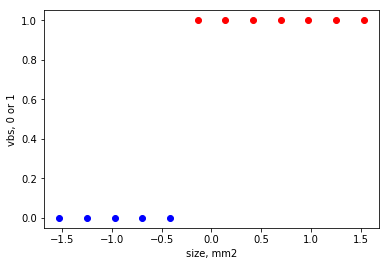

In [218]:
plot_result(np.array(x), np.array(y))

In [219]:
#k = torch.tensor([.01], requires_grad=True)
#b = torch.tensor([.01], requires_grad=True)

k =  torch.randn(1 , requires_grad=True)
b =  torch.randn(1 , requires_grad=True)

print(k, type(k), k.requires_grad)
print(b, type(b), b.requires_grad)

tensor([ 1.0754]) <class 'torch.Tensor'> True
tensor([ 0.8712]) <class 'torch.Tensor'> True


In [220]:
y_ = 1 / (1 + torch.exp(- (k*x + b)))

print(y_, type(y_), y_.requires_grad)

tensor([ 0.3166,  0.3844,  0.4569,  0.5313,  0.6044,  0.6731,  0.7350,
         0.7889,  0.8344,  0.8716,  0.9014,  0.9250]) <class 'torch.Tensor'> True


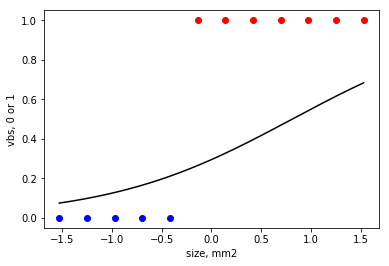

In [221]:
plot_result(np.array(x), np.array(y), [float(b), float(k)])

In [222]:
#loss_vector = (y - y_)**2 # or
loss_vector = - (y * torch.log(y_) + (1-y) * torch.log(1-y_)) #or @much better@


In [223]:
loss = loss_vector.mean()
loss

tensor(0.3836)

In [224]:
BCE = torch.nn.BCELoss() #or @much better@ (more stable: less NaNs and faster in c++)
loss = BCE(y_, y)

loss

tensor(0.3836)

In [225]:
learning_rate = 0.1
optimizer = torch.optim.SGD([k, b], lr=learning_rate)

In [226]:
# Learning Loop 
for _ in range(100001):

    y_ =  1 / (1+ torch.exp((-k*x + b)))
    
    #loss_vector = (y - y_)**2
    #loss = loss_vector.mean()
    
    #loss_vector = - (y * torch.log(y_) + (1-y) * torch.log(1-y_))
    #loss = loss_vector.mean()

    loss = BCE(y_, y)

    optimizer.zero_grad() # clean all grad    
    loss.backward() # ~backprob~ step
    
    optimizer.step()
    
    if _ % 10000 == 0:
        print('step = ', _)
        print('step_loss = ', loss_vector, loss)
        print('step_k_grad = ', k.grad)
        print('step_b_grad = ', b.grad)
        print('step_y_ = ', y_)
        print('step_k = ', k)
        print('step_b = ', b)
        print('____________')

step =  0
step_loss =  tensor([ 0.3807,  0.4851,  0.6105,  0.7579,  0.9273,  0.3959,  0.3078,
         0.2371,  0.1811,  0.1374,  0.1038,  0.0780]) tensor(0.5288)
step_k_grad =  tensor([-0.2152])
step_b_grad =  tensor([ 0.2519])
step_y_ =  tensor([ 0.0750,  0.0986,  0.1284,  0.1656,  0.2111,  0.2650,  0.3269,
         0.3956,  0.4687,  0.5431,  0.6156,  0.6834])
step_k =  tensor([ 1.0969])
step_b =  tensor([ 0.8460])
____________
step =  10000
step_loss =  tensor([ 0.3807,  0.4851,  0.6105,  0.7579,  0.9273,  0.3959,  0.3078,
         0.2371,  0.1811,  0.1374,  0.1038,  0.0780]) tensor(1.00000e-02 *
       3.1838)
step_k_grad =  tensor(1.00000e-03 *
       [-4.1306])
step_b_grad =  tensor(1.00000e-03 *
       [ 1.1551])
step_y_ =  tensor([ 4.9407e-07,  1.2320e-05,  3.0714e-04,  7.6030e-03,  1.6040e-01,
         8.2651e-01,  9.9165e-01,  9.9966e-01,  9.9999e-01,  1.0000e+00,
         1.0000e+00,  1.0000e+00])
step_k =  tensor([ 11.5971])
step_b =  tensor([-3.1694])
____________
step =  

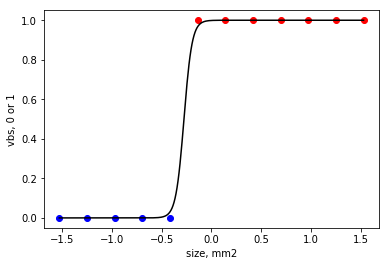

In [227]:
plot_result(np.array(x), np.array(y), [float(b), float(k)])